In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

api_key = "558e56b6dce2cececb94ac03459570d9"

In [2]:
rain_df = pd.read_csv('Annual_Precipitation.csv')

rain_df.head()


,State,Inches,Milli­metres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


In [3]:
sun_df = pd.read_csv('Sunniness_by_Ranking.csv')
sun_df.columns = ['State', 'Sun %', 'Total Hours', 'Days']
sun_df.head()

,State,Sun %,Total Hours,Days
0,Alabama,58,2641,99
1,Alaska,41,2061,61
2,Arizona,85,3806,193
3,Arkansas,61,2771,123
4,California,68,3055,146


In [4]:
snow_df = pd.read_csv('annual_snow.csv')
snow_df.head()

,State,Inches
0,Alabama,1.6
1,Alaska,74.5
2,Arizona,0.3
3,Arkansas,5.2
4,California,0


In [5]:
state = []
inches = []

i = 0
for row in rain_df.State:
   #for every row append the city at index 0 and state at index 1
    state.append(rain_df.State)
    inches.append(rain_df.Inches)
    i += 1


In [6]:
sun_state = []
sun_days = []

i = 0
for row in sun_df.Days:
   #for every row append the city at index 0 and state at index 1
    sun_state.append(sun_df.State)
    sun_days.append(sun_df.Days)
    i += 1


In [7]:
snow_state = []
snow_inches = []

i = 0
for row in snow_df.Inches:
   #for every row append the city at index 0 and state at index 1
    snow_state.append(snow_df.State)
    snow_inches.append(snow_df.Inches)
    i += 1


In [8]:
starter_df = pd.read_csv('miserable_cities.csv')

starter_df.head(50)


,Unnamed: 0,index,City_State,Unemployment,Divorce_Rate,Earning_Change,Well_Being_Index,Poor_Mental_Health,Misery
0,0,49,"Detroit, MI",24.90%,12.00%,-2.77%,60.7,4.3,99.6
1,1,48,"Cleveland, OH",18.50%,14.40%,7.21%,61,4.0,89.8
2,2,47,"Dayton, OH",14.70%,15.70%,0.43%,60.6,4.4,87.2
3,3,46,"Macon, GA",18.70%,12.30%,6.58%,None,4.1,86.6
4,4,45,"Toledo, OH",13.70%,14.90%,0.42%,59.8,4.2,82.4
5,5,44,"Birmingham, AL",13.30%,15.20%,-0.28%,62,4.0,81.0
6,6,43,"Rockford, IL",14.90%,13.70%,-3.01%,59.9,3.8,80.0
7,7,42,"San Bernadino, CA",16.60%,10.60%,-3.83%,62.1,4.0,78.4
8,8,41,"Akron, OH",12.60%,14.40%,2.19%,60.7,4.0,78.0
9,9,40,"Modesto, CA",14.80%,11.70%,1.12%,61.4,4.1,77.6


In [9]:
code_df = pd.read_csv('state_codes.csv')
code_df.columns = ['State', 'State_Code']
code_df.head()

,State,State_Code
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [10]:
cities = []
states = []
rank = []


i = 0
for row in starter_df.City_State:
   #for every row append the city at index 0 and state at index 1
    cities.append(starter_df.City_State.str.split(',')[i][0])
    states.append(starter_df.City_State.str.split(',')[i][1])
    rank.append(i+1)
    
    i += 1

    


city_state = pd.DataFrame({"City": cities,
                          "State": states,
                          "Rank": rank})

city_state['State'] = city_state['State'].astype(str)
city_state.head()

,City,State,Rank
0,Detroit,MI,1
1,Cleveland,OH,2
2,Dayton,OH,3
3,Macon,GA,4
4,Toledo,OH,5


In [11]:
code_df = pd.read_csv('state_codes.csv')
code_df.columns = ['State', 'State_Code']
code_df['State'] = code_df['State'].astype(str)

code_df.head()

,State,State_Code
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [12]:
namelist = []
cityidlist = []
latlist = []
lonlist = []
templist = []
humidlist = []
cloudlist = []
windspeedlist = []
countrylist = []
rainlist = []
ranklist = []


#Then construct the URL
#make sure to use imperial
#start with a base
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'

#then add your api key and create a unique url for every city in cities (list i created earlier)
#everything has to be in lists
#open weather api is as follows: http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=houston

x=0

for city in cities:
    
    if city == "Barnstable Town":
        query_url = base_url + '&appid=' + str(api_key) + '&q=Barnstable'
        response = requests.get(query_url)
        json_response = response.json()
        x = x + 1
        print('Retrieving Data for City #' + str(x) + ' of ' + str((len(cities))) + " | " + city +","+json_response['sys']['country'])
        namelist.append(json_response['name'])
        cityidlist.append(json_response['id'])
        latlist.append(json_response['coord']['lat'])
        lonlist.append(json_response['coord']['lon'])
        templist.append(json_response['main']['temp_max'])
        humidlist.append(json_response['main']['humidity'])
        cloudlist.append(json_response['clouds']['all'])
        windspeedlist.append(json_response['wind']['speed'])
        countrylist.append(json_response['sys']['country'])
        ranklist.append(x)
        
    else:
        try:
            query_url = base_url + '&appid=' + str(api_key) + '&q=' + str(city)
            response = requests.get(query_url)
            json_response = response.json()
            x = x + 1
            print('Retrieving Data for City #' + str(x) + ' of ' + str((len(cities))) + " | " + city +","+json_response['sys']['country'])
            namelist.append(json_response['name'])
            cityidlist.append(json_response['id'])
            latlist.append(json_response['coord']['lat'])
            lonlist.append(json_response['coord']['lon'])
            templist.append(json_response['main']['temp_max'])
            humidlist.append(json_response['main']['humidity'])
            cloudlist.append(json_response['clouds']['all'])
            windspeedlist.append(json_response['wind']['speed'])
            countrylist.append(json_response['sys']['country'])
            rainlist.append(rain_df['Inches'])
            ranklist.append(x)
            print(query_url)
        except KeyError:
            namelist.append(np.nan)
            cityidlist.append(np.nan)
            latlist.append(np.nan)
            lonlist.append(np.nan)
            templist.append(np.nan)
            humidlist.append(np.nan)
            cloudlist.append(np.nan)
            windspeedlist.append(np.nan)
            countrylist.append(np.nan)
            ranklist.append(x)
            x = x
            print("City not Found, Moving on to next City...")
            continue


Retrieving Data for City #1 of 25 | Detroit,US
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Detroit
Retrieving Data for City #2 of 25 | Cleveland,US
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Cleveland
Retrieving Data for City #3 of 25 | Dayton,US
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Dayton
Retrieving Data for City #4 of 25 | Macon,US
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Macon
Retrieving Data for City #5 of 25 | Toledo,PH
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Toledo
Retrieving Data for City #6 of 25 | Birmingham,US
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=Birmingham
Retrieving Data for City #7 of 25 | Rockford,US
ht

In [13]:
# Convert retrieved lists to a dictionary first and then to a dataframe
# formatting for creating a dictionary is       variable_name = {"Key": value, "Key": value, etc}


weather_dict = {"Name": namelist,
                "State": states,
               "Country_id": cityidlist,
                "Country": countrylist,
                "Cloudiness (%)": cloudlist,
                "Max Temperature (F)": templist,
                "Latitude (Deg)": latlist,
                "Longitude (Deg)": lonlist,
                "Humidity (%)": humidlist,
                "Wind Speed (mph)": windspeedlist,
                "Ranking" : ranklist
               }

#create the dataframe from the dictionary
#format is vairable_name = pd.DataFrame(name of dictionary)
weather_df = pd.DataFrame(weather_dict)

#Drop the Nan Values
weather_df = weather_df.dropna(how='any')

weather_df.head(50)

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5
5,Birmingham,AL,4049979.0,US,1.0,28.94,33.52,-86.80,100.0,2.39,6
6,Rockford,IL,4907959.0,US,1.0,-5.98,42.27,-89.09,74.0,3.96,7
8,Akron,OH,5145476.0,US,1.0,17.06,41.08,-81.52,78.0,3.18,9
9,Modesto,CA,5373900.0,US,1.0,46.40,37.64,-121.00,96.0,3.36,10
10,Buffalo,NY,5110629.0,US,90.0,14.00,42.89,-78.88,66.0,12.75,11


In [14]:
rain_df.head()

,State,Inches,Milli­metres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


In [15]:
sun_df.head()

,State,Sun %,Total Hours,Days
0,Alabama,58,2641,99
1,Alaska,41,2061,61
2,Arizona,85,3806,193
3,Arkansas,61,2771,123
4,California,68,3055,146


In [16]:
sun_df.set_index("State", drop=True, inplace=True)
sun_df.head()

,Sun %,Total Hours,Days
State,,,
Alabama,58,2641,99
Alaska,41,2061,61
Arizona,85,3806,193
Arkansas,61,2771,123
California,68,3055,146


In [17]:
rain_df.set_index("State", drop=True, inplace=True)
rain_df.head(10)

,Inches,Milli­metres,Rank
State,,,
Alabama,58.3,1480,4
Alaska,22.5,572,39
Arizona,13.6,345,47
Arkansas,50.6,1284,8
California,22.2,563,40
Colorado,15.9,405,44
Connecticut,50.3,1279,9
District of Columbia,25.2,1279,5
Delaware,45.7,1160,16


In [18]:
snow_df.set_index("State", drop=True, inplace=True)
snow_df.head(10)

,Inches
State,
Alabama,1.6
Alaska,74.5
Arizona,0.3
Arkansas,5.2
California,0
Colorado,19.1
Connecti­cut,40.5
Delaware,20.2
Florida,0


In [19]:
code_df.set_index("State", drop=True, inplace=True)
code_df.head(10)

,State_Code
State,
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas
CA,California
CO,Colorado
CT,Connecticut
DE,Delaware
DC,District of Columbia


In [20]:
def get_state(row):
    state_dic = code_df.to_dict(orient="index")
    state=row["State"]
    inches=state_dic[state]["State_Code"]
    return inches

weather_df["State"]=weather_df["State"].apply(lambda x: x.strip())
weather_df['Full_State'] = weather_df.apply(get_state,axis=1)
weather_df.head(50)

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio
5,Birmingham,AL,4049979.0,US,1.0,28.94,33.52,-86.80,100.0,2.39,6,Alabama
6,Rockford,IL,4907959.0,US,1.0,-5.98,42.27,-89.09,74.0,3.96,7,Illinois
8,Akron,OH,5145476.0,US,1.0,17.06,41.08,-81.52,78.0,3.18,9,Ohio
9,Modesto,CA,5373900.0,US,1.0,46.40,37.64,-121.00,96.0,3.36,10,California
10,Buffalo,NY,5110629.0,US,90.0,14.00,42.89,-78.88,66.0,12.75,11,New York


In [21]:
def get_rain(row):
    rain_dic = rain_df.to_dict(orient="index")
    state=row["Full_State"]
    rain=rain_dic[state]["Inches"]
    return rain
weather_df=weather_df[weather_df["State"]!="District of Columbia"]
weather_df["Full_State"]=weather_df["Full_State"].apply(lambda x: x.strip())
weather_df['Rainfall'] = weather_df.apply(get_rain,axis=1)
weather_df.head()

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State,Rainfall
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan,32.8
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio,39.1
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio,39.1
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia,50.7
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio,39.1


In [22]:
def get_sun(row):
    sun_dic = sun_df.to_dict(orient="index")
    state=row["Full_State"]
    days=sun_dic[state]["Days"]
    return days

weather_df=weather_df[weather_df["State"]!="Virginia"]
weather_df["Full_State"]=weather_df["Full_State"].apply(lambda x: x.strip())
weather_df['Sunshine'] = weather_df.apply(get_sun,axis=1)
weather_df.head()

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State,Rainfall,Sunshine
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan,32.8,71
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio,39.1,72
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio,39.1,72
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia,50.7,112
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio,39.1,72


In [23]:
def get_snow(row):
    snow_dic = snow_df.to_dict(orient="index")
    state=row["Full_State"]
    days=snow_dic[state]["Inches"]
    return days

weather_df=weather_df[weather_df["Full_State"]!="Massachusetts"]
weather_df=weather_df[weather_df["Full_State"]!="Tennessee"]

weather_df["Full_State"]=weather_df["Full_State"].apply(lambda x: x.strip())
weather_df['Snow'] = weather_df.apply(get_snow,axis=1)
weather_df.head()

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State,Rainfall,Sunshine,Snow
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan,32.8,71,51.1
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio,39.1,72,27.5
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio,39.1,72,27.5
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia,50.7,112,0.7
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio,39.1,72,27.5


In [24]:
sun_dic = sun_df.to_dict(orient="index")
# rain_dic

# # d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}
# # df['D'] = df['U'].map(d)
# # df



weather_df.head(50)

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State,Rainfall,Sunshine,Snow
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan,32.8,71,51.1
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio,39.1,72,27.5
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio,39.1,72,27.5
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia,50.7,112,0.7
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio,39.1,72,27.5
5,Birmingham,AL,4049979.0,US,1.0,28.94,33.52,-86.80,100.0,2.39,6,Alabama,58.3,99,1.6
6,Rockford,IL,4907959.0,US,1.0,-5.98,42.27,-89.09,74.0,3.96,7,Illinois,39.2,95,24.6
8,Akron,OH,5145476.0,US,1.0,17.06,41.08,-81.52,78.0,3.18,9,Ohio,39.1,72,27.5
9,Modesto,CA,5373900.0,US,1.0,46.40,37.64,-121.00,96.0,3.36,10,California,22.2,146,0
10,Buffalo,NY,5110629.0,US,90.0,14.00,42.89,-78.88,66.0,12.75,11,New York,41.8,63,123.8


In [25]:
rain_dic = rain_df.to_dict(orient="index")
# rain_dic

# # d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}
# # df['D'] = df['U'].map(d)
# # df



weather_df.head(50)

,Name,State,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Longitude (Deg),Humidity (%),Wind Speed (mph),Ranking,Full_State,Rainfall,Sunshine,Snow
0,Detroit,MI,4990729.0,US,1.0,11.84,42.35,-83.06,71.0,5.30,1,Michigan,32.8,71,51.1
1,Cleveland,OH,5150529.0,US,1.0,15.98,41.51,-81.69,78.0,3.96,2,Ohio,39.1,72,27.5
2,Dayton,OH,4509884.0,US,90.0,23.00,39.76,-84.19,65.0,4.70,3,Ohio,39.1,72,27.5
3,Macon,GA,4207400.0,US,1.0,30.20,32.84,-83.63,89.0,3.36,4,Georgia,50.7,112,0.7
4,Toledo,OH,1681602.0,PH,75.0,84.20,10.38,123.64,58.0,20.80,5,Ohio,39.1,72,27.5
5,Birmingham,AL,4049979.0,US,1.0,28.94,33.52,-86.80,100.0,2.39,6,Alabama,58.3,99,1.6
6,Rockford,IL,4907959.0,US,1.0,-5.98,42.27,-89.09,74.0,3.96,7,Illinois,39.2,95,24.6
8,Akron,OH,5145476.0,US,1.0,17.06,41.08,-81.52,78.0,3.18,9,Ohio,39.1,72,27.5
9,Modesto,CA,5373900.0,US,1.0,46.40,37.64,-121.00,96.0,3.36,10,California,22.2,146,0
10,Buffalo,NY,5110629.0,US,90.0,14.00,42.89,-78.88,66.0,12.75,11,New York,41.8,63,123.8


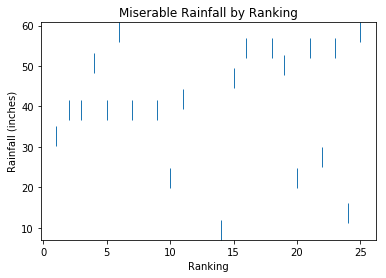

In [26]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)

plt.scatter(weather_df['Ranking'], weather_df['Rainfall'], linewidth=1, edgecolors='black', marker='|', s=400)

plt.xlabel('Ranking')
plt.ylabel('Rainfall (inches)')
plt.title('Miserable Rainfall by Ranking')

#save as png
plt.savefig("Miserable_Rainfall_by_Ranking")
#show the plot
plt.show()

In [27]:
new_lon =weather_df['Longitude (Deg)'].dropna().tolist()
new_lon

[-83.06,
 -81.69,
 -84.19,
 -83.63,
 123.64,
 -86.8,
 -89.09,
 -81.52,
 -121.0,
 -78.88,
 -115.15,
 -74.17,
 -80.14,
 -80.35,
 -94.16,
 -119.78,
 -81.98,
 -123.03,
 -80.19,
 -110.93,
 -88.04]

In [28]:
# first start by creating blank lists for our columns/data we wanna retrieve

uvlist = []


#Then construct the URL
#make sure to use imperial
#start with a base
base_url = 'http://api.openweathermap.org/data/2.5/uvi?'

# http://api.openweathermap.org/data/2.5/uvi?appid=558e56b6dce2cececb94ac03459570d9&lat=40.02&lon=-105.27

#then add your api key and create a unique url for every city in cities (list i created earlier)
#everything has to be in lists
#open weather api is as follows: http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=houston

x=0

for lat in latlist:
    query_url = base_url + '&appid=' + str(api_key) + '&lat=' + str(lat)
#     response = requests.get(query_url)
#     json_response = response.json()
#     uvlist.append(json_response["value"])
#     x + 1
#     print(query_url)

for lon in new_lon:
    new_url = query_url + '&lon=' + str(lon)
    response = requests.get(new_url)
    json_response = response.json()
    uvlist.append(json_response["value"])
    

In [29]:
uvlist

[4.27,
 4.35,
 4.21,
 4.23,
 4.96,
 3.98,
 3.75,
 4.35,
 4.46,
 4.45,
 4.23,
 4.5,
 4.42,
 4.41,
 3.51,
 4.46,
 4.31,
 4.53,
 4.42,
 4.09,
 3.84]

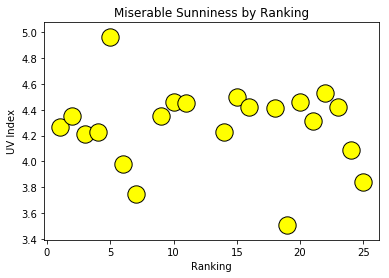

In [30]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)

sun_scat = plt.scatter(weather_df['Ranking'], uvlist, linewidth=1, edgecolors='black', color='yellow', s=300)
plt.xlabel('Ranking')
plt.ylabel('UV Index')
plt.title('Miserable Sunniness by Ranking')


#save as png
plt.savefig("Miserable_Sunniness_by_Ranking")
#show the plot
plt.show()

In [31]:
pd.to_numeric(weather_df['Snow'])

0      51.1
1      27.5
2      27.5
3       0.7
4      27.5
5       1.6
6      24.6
8      27.5
9       0.0
10    123.8
13     21.8
14     16.5
15      0.0
17      0.0
18      7.6
19      0.0
20      0.0
21      3.0
22      0.0
23      0.3
24      1.6
Name: Snow, dtype: float64

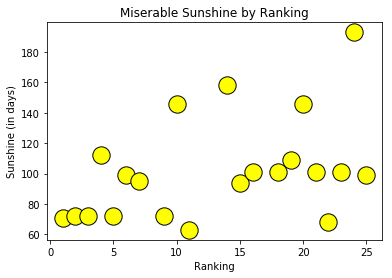

In [51]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)

plt.scatter(weather_df['Ranking'], weather_df['Sunshine'], linewidth=1, edgecolors='black', color='yellow', s=300)

plt.xlabel('Ranking')
plt.ylabel('Sunshine (in days)')
plt.title('Miserable Sunshine by Ranking')
plt.style.use('dark_background')

#save as png
plt.savefig("Miserable_Sunshine_by_Ranking")
#show the plot
plt.show()

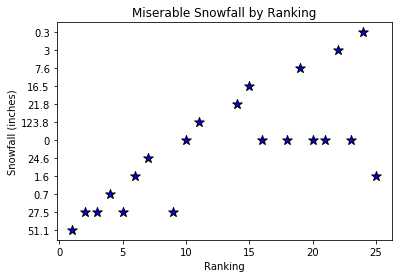

In [50]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)

plt.scatter(weather_df['Ranking'], weather_df['Snow'], linewidth=1, edgecolors='black', color='blue', s=100, marker="*")

plt.xlabel('Ranking')
plt.ylabel('Snowfall (inches)')
plt.title('Miserable Snowfall by Ranking')


#save as png
plt.savefig("Miserable_Snow_by_Ranking")
#show the plot
plt.show()

In [34]:
#Convert this dataframe to a csv and put in in the Output folder
#Format is dfname.to_csv("folder/filename.csv", index=False)
weather_df.to_csv('bottom_25_weather.csv', index=False)

In [54]:
ax = weather_df.plot(kind='scatter', x=ranklist, y=inches, color='white', alpha=0.5, linewidth=0)
ax.set_ylim((0, 85))
ax.set_xlim((0, 70000))
# Specify background color for the axis/plot
ax.set_axis_bgcolor("lightslategray")

KeyError: '[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25] not in index'